In [4]:
from numpy import *; from numpy.core.records import fromarrays;from scipy.constants import *
from matplotlib.pyplot import *
import sys; sys.path.insert(0,'/home/noah/Desktop/large_analysis/ca_analysis/'); import os
import predefined as pd; import fileread as fr
from random import seed,shuffle




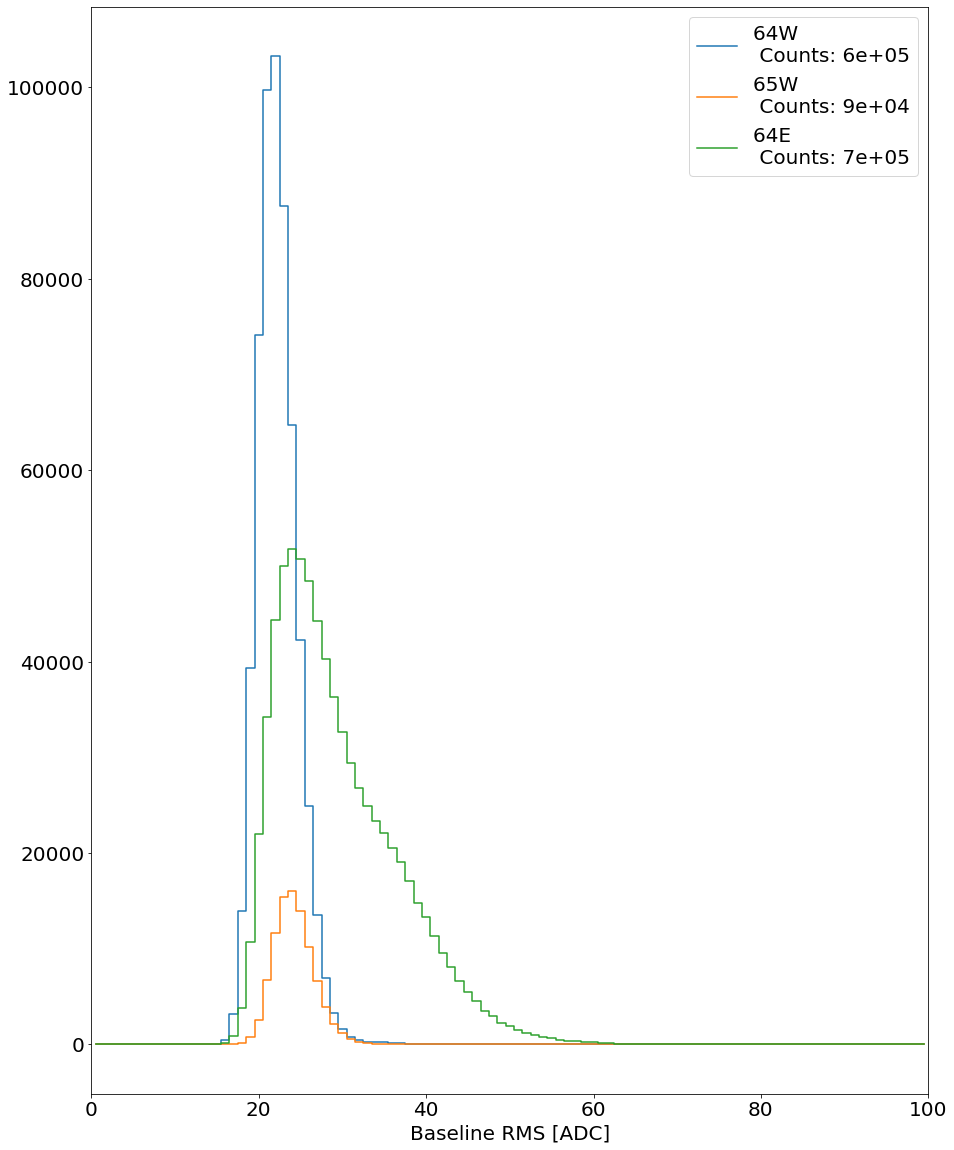

In [9]:
fs=20
path='/home/noah/Desktop/large_analysis/ca_analysis/cur_data/'
runs=[run for run in os.listdir(path) if run.endswith('-all.dat')]
runs.sort()
j=3
seed(3)
shuffle(runs)
nbins,rang=100,[0,100]

fig,ax=subplots(nrows=1,figsize=(15,20))

thresh=70
data=pd.precuts(fr.gen_output(path+runs[j])[0],energy=thresh,oscillation=True,osc_amp=50)

bd,ch=divmod(11,8)
t=(data.board==bd)*(data.channel==ch)
d_hist,bins=np.histogram(data.pretrigrms[t],bins=nbins,range=rang)
bins=pd.cbins(bins).astype(float)
ax.plot(bins,d_hist,ds='steps',label=pd.pixel(bd,ch)+' \n Counts: {:0.0e}'.format(np.sum(t)))

bd,ch=divmod(12,8)
t=(data.board==bd)*(data.channel==ch)
d_hist,bins=np.histogram(data.pretrigrms[t],bins=nbins,range=rang)
bins=pd.cbins(bins).astype(float)
ax.plot(bins,d_hist,ds='steps',label=pd.pixel(bd,ch)+' \n Counts: {:0.0e}'.format(np.sum(t)))

bd,ch=divmod(35,8)
t=(data.board==bd)*(data.channel==ch)
d_hist,bins=np.histogram(data.pretrigrms[t],bins=nbins,range=rang)
bins=pd.cbins(bins).astype(float)
ax.plot(bins,d_hist,ds='steps',label=pd.pixel(bd,ch)+' \n Counts: {:0.0e}'.format(np.sum(t)))



ax.set_xlabel('Baseline RMS [ADC]',fontsize=fs)
ax.tick_params(labelsize=fs)
ax.legend(fontsize=fs)
ax.set_xlim(0,100)
show()

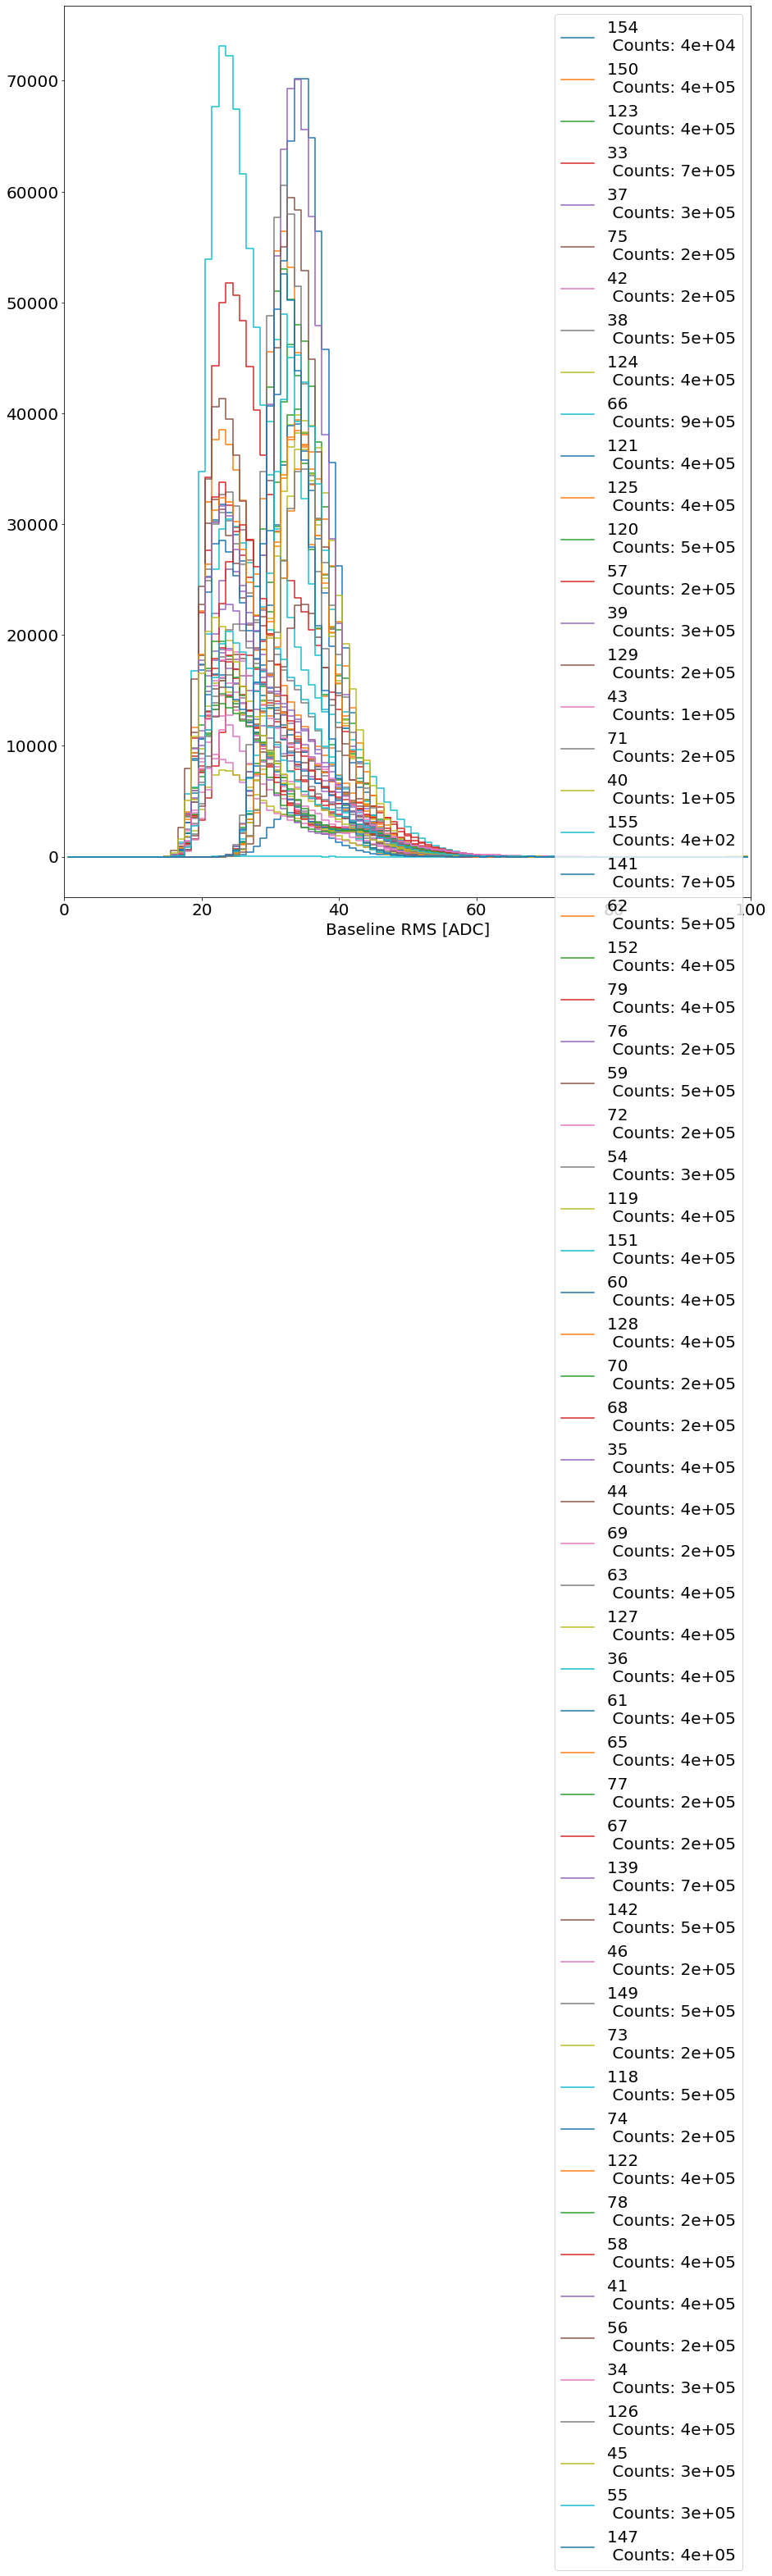

In [10]:
fs=20
path='/home/noah/Desktop/large_analysis/ca_analysis/cur_data/'
runs=[run for run in os.listdir(path) if run.endswith('-all.dat')]
runs.sort()
j=3
seed(3)
shuffle(runs)
nbins,rang=100,[0,100]

fig,ax=subplots(nrows=1,figsize=(15,20))

thresh=70
for run in runs:
    data=pd.precuts(fr.gen_output(path+run)[0],energy=thresh,oscillation=True,osc_amp=50)

    # bd,ch=divmod(11,8)
    # t=(data.board==bd)*(data.channel==ch)
    # d_hist,bins=np.histogram(data.pretrigrms[t],bins=nbins,range=rang)
    # bins=pd.cbins(bins).astype(float)
    # ax.plot(bins,d_hist,ds='steps',label=pd.pixel(bd,ch)+' \n Counts: {:0.0e}'.format(np.sum(t)))

    # bd,ch=divmod(12,8)
    # t=(data.board==bd)*(data.channel==ch)
    # d_hist,bins=np.histogram(data.pretrigrms[t],bins=nbins,range=rang)
    # bins=pd.cbins(bins).astype(float)
    # ax.plot(bins,d_hist,ds='steps',label=pd.pixel(bd,ch)+' \n Counts: {:0.0e}'.format(np.sum(t)))

    bd,ch=divmod(35,8)
    t=(data.board==bd)*(data.channel==ch)
    d_hist,bins=np.histogram(data.pretrigrms[t],bins=nbins,range=rang)
    bins=pd.cbins(bins).astype(float)
    ax.plot(bins,d_hist,ds='steps',label=run[4:-8]+' \n Counts: {:0.0e}'.format(np.sum(t)))



ax.set_xlabel('Baseline RMS [ADC]',fontsize=fs)
ax.tick_params(labelsize=fs)
ax.legend(fontsize=fs)
ax.set_xlim(0,100)
show()

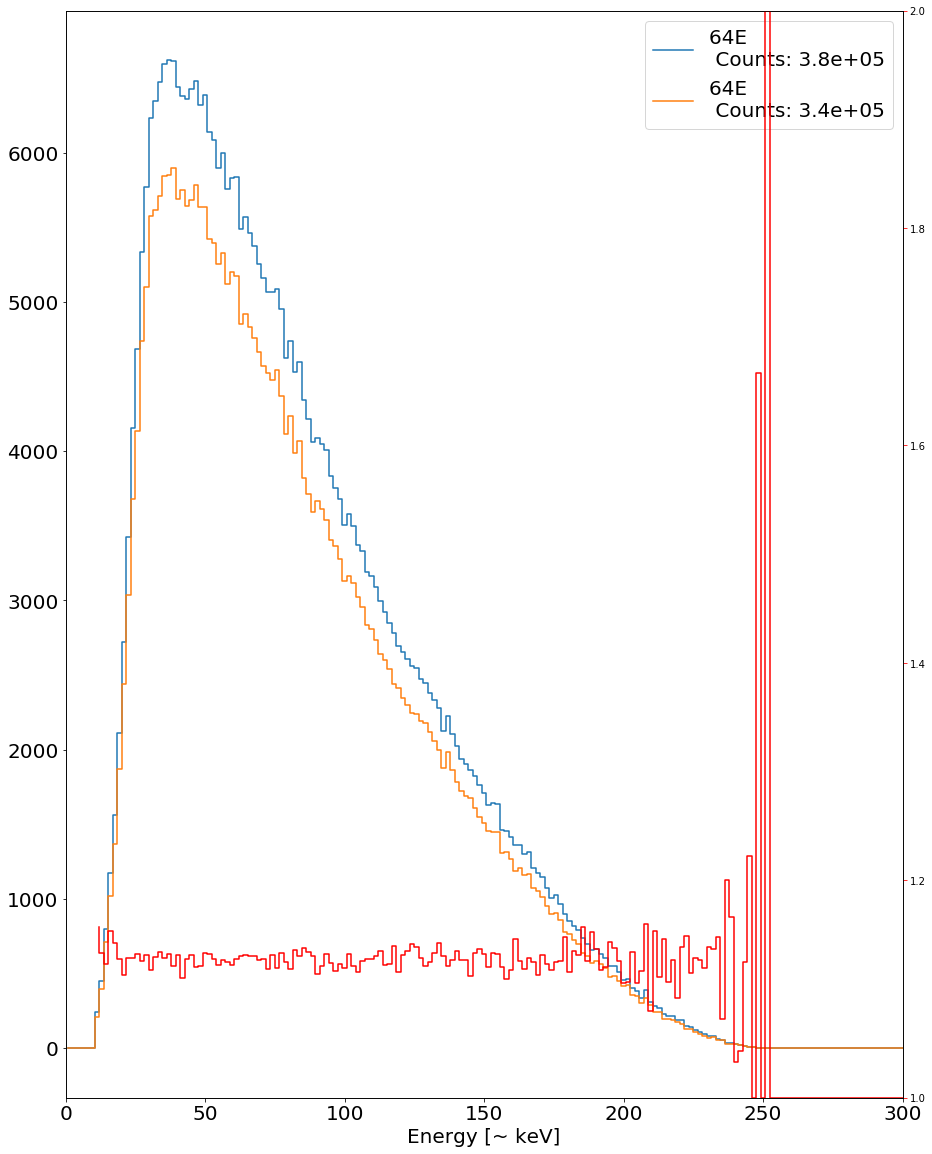

In [3]:
fs=20
path='/home/noah/Desktop/large_analysis/ca_analysis/cur_data/'
runs=[run for run in os.listdir(path) if run.endswith('-all.dat')]
runs.sort()
j=3
seed(10)
shuffle(runs)
nbins,rang=500,[0,5000]

fig,ax=subplots(nrows=1,figsize=(15,20))

thresh=70
data=pd.precuts(fr.gen_output(path+runs[j])[0],energy=thresh,oscillation=True,osc_amp=50)



bd,ch=divmod(35,8)
t=(data.board==bd)*(data.channel==ch)
d_hist,bins=np.histogram(data.energy[t],bins=nbins,range=rang)
d0=d_hist.astype(float)
bins=pd.cbins(bins).astype(float)
ax.plot(bins/6.2,d_hist,ds='steps',label=pd.pixel(bd,ch)+' \n Counts: {:0.1e}'.format(np.sum(t)))

t=(data.board==bd)*(data.channel==ch)*(data.pretrigrms<40)
d_hist,bins=np.histogram(data.energy[t],bins=nbins,range=rang)
d1=d_hist.astype(float)
bins=pd.cbins(bins).astype(float)
ax.plot(bins/6.2,d_hist,ds='steps',label=pd.pixel(bd,ch)+' \n Counts: {:0.1e}'.format(np.sum(t)))

ax.set_xlabel('Energy [~ keV]',fontsize=fs)
ax.tick_params(labelsize=fs)
ax.legend(fontsize=fs)
ax.set_xlim(0,300)

ax1=ax.twinx()
ax1.plot(bins[d1>=1]/6.2,d0[d1>=1]/d1[d1>=1],ds='steps',c='r')
ax1.tick_params(axis='y',color='r')
ax1.set_ylim(1,2)
show()